In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate temperature over time
def simulate_temperature(delta_t, time_end=1):
    """
    Simulate the temperature over time using a random walk.
    
    Parameters:
    delta_t (float): The time increment
    time_end (float): The end time of the simulation
    
    Returns:
    np.array: Array of temperatures over time
    """
    num_steps = int(time_end / delta_t)
    temperature = np.zeros(num_steps)
    
    for i in range(1, num_steps):
        # Increment is a normal distribution with mean 0 and variance delta_t
        increment = np.random.normal(0, np.sqrt(delta_t))
        temperature[i] = temperature[i-1] + increment
    
    return temperature

In [5]:
# Function to estimate the proportion of time temperature is positive
def estimate_proportion(temperature):
    """
    Estimate the proportion of time the temperature is positive.
    
    Parameters:
    temperature (np.array): Array of temperatures over time
    
    Returns:
    float: Proportion of time temperature is positive
    """
    positive_time = np.sum(temperature > 0)
    total_time = len(temperature)
    return positive_time / total_time

In [6]:
# Monte Carlo Simulation
def monte_carlo_simulation(delta_t, num_simulations=1000):
    """
    Perform Monte Carlo simulation to estimate the distribution of the proportion of time 
    the temperature is positive.
    
    Parameters:
    delta_t (float): The time increment
    num_simulations (int): Number of simulations to run
    
    Returns:
    np.array: Array of estimated proportions from simulations
    """
    proportions = np.zeros(num_simulations)
    
    for i in range(num_simulations):
        temperature = simulate_temperature(delta_t)
        proportions[i] = estimate_proportion(temperature)
    
    return proportions

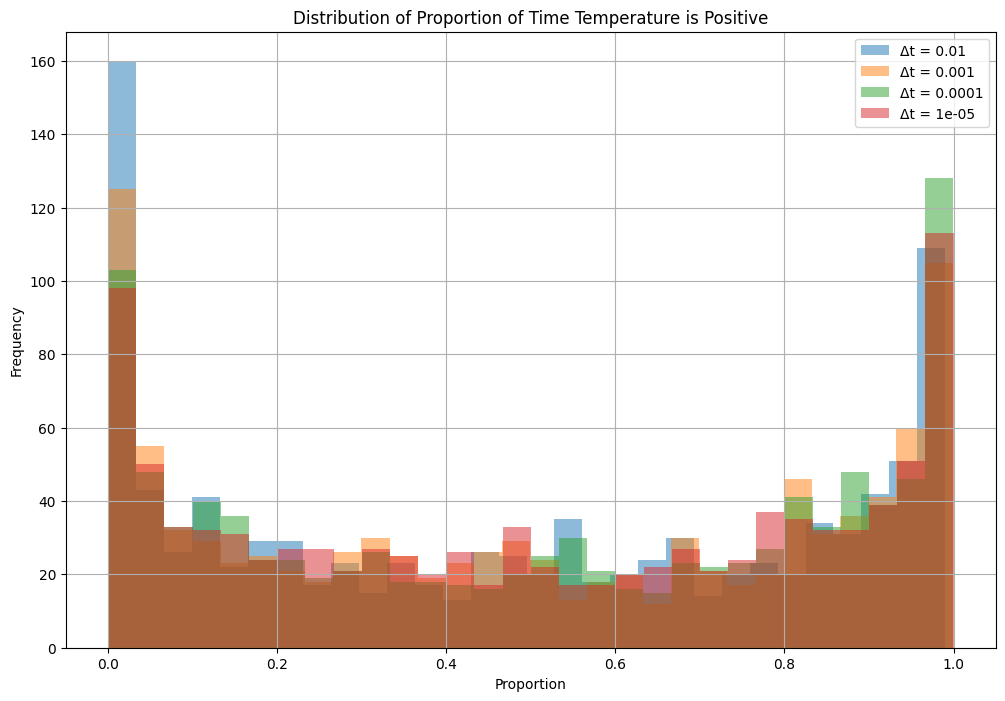

In [13]:
# Run simulations for different values of delta_t
delta_t_values = [0.01, 0.001, 0.0001, 0.00001]
proportion_distributions = {}

for delta_t in delta_t_values:
    proportion_distributions[delta_t] = monte_carlo_simulation(delta_t)

# Plotting the results
plt.figure(figsize=(12, 8))

for delta_t, distributions in proportion_distributions.items():
    plt.hist(distributions, bins=30, alpha=0.5, label=f"Δt = {delta_t}")

plt.title("Distribution of Proportion of Time Temperature is Positive")
plt.xlabel("Proportion")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig('q1.png', dpi=300)
plt.show()